Lista #1 de exercícios da disciplina Otimização Natural (CPE723)
link: http://www.pads.ufrj.br/~gabriel/cpe723/ListaExercicios1.pdf

In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import sys
print(sys.version)
import warnings
# warnings.filterwarnings("ignore", category= np.VisibleDeprecationWarning)
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


Questão 1.

In [82]:
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print(df)

          a         b         c         d         e
0  1.834261  0.860534  0.450901  0.978999  0.068983
1  1.223257 -0.152005 -0.680739  0.034408 -0.827050
2 -0.291467 -1.103624 -0.042096 -1.740620  0.825804
3  0.729929  1.360472 -1.468618  1.821362 -0.650147
4  0.882357  0.047493 -0.923413  0.011168 -0.727404
5  0.909079  1.071525 -0.055059  1.436740  0.399700
6  0.490328 -0.741586 -0.256304 -0.638610  0.466478
7  1.219371  0.569543 -0.357632 -0.238412 -0.667471
8 -1.515126 -0.893867  0.090847 -0.474023  1.482314
9  1.560294  0.996460 -1.035739  0.768155 -0.354796


meu $\nabla\lambda$
\begin{table}
\begin{tabular}{lll}
   1.1 & 1.2 & 1.3 \\
   2.1 & 2.2 & 2.3 \\
\end{tabular}
\end{table}
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

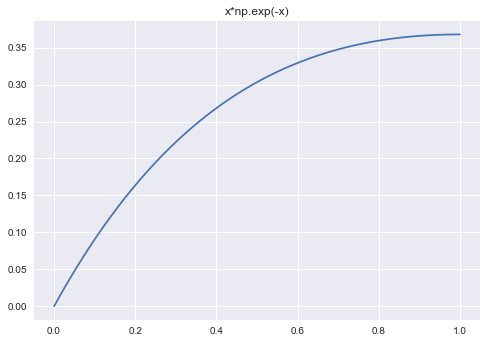

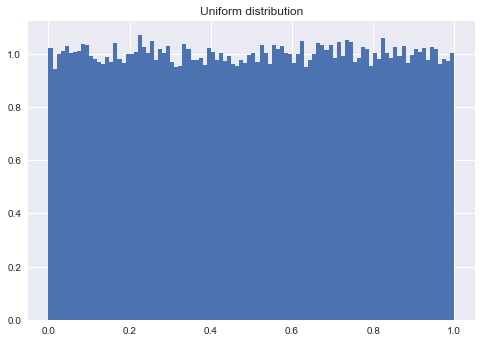

	 Integral with uniform sampling: 0.26432




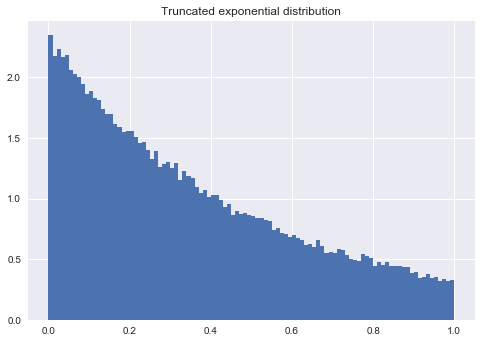

	 Integral with exponential sampling: 0.20625


In [3]:
# numeros de pontos
N = int(1e5)


#grafico da função x*exp(-x) de 0 até 1
x = np.linspace(0, 1, num=1e4)
plt.plot(x,x*np.exp(-x))
plt.title('x*np.exp(-x)')
plt.show()
print('\n')

# tiragem aleaoria uniforme 
x = np.random.rand(N)
plt.hist(x,100, normed=1)
plt.title('Uniform distribution')
plt.show()
# sns.plt.title('YOUR TITLE HERE')
# sns.distplot(x, kde=False,);

# integral de x*exp(-x) de 0 até 1
integralUni = (x*np.exp(-x)).mean()
print('\t Integral with uniform sampling: {:1.5f}\n\n'.format(integralUni))


# tiragem aleaoria exponencial ( pdf(x) = a*exp(-ax), x>0) e valores no intervalo [0,1]
# Inverse transform sampling : 'https://en.wikipedia.org/wiki/Inverse_transform_sampling'
# cdf(x) = 1 - exp(-ax) -> cdf^(-1)(x) = - (1/a)*ln(1-x)
lambd = 0.5 # lambd = coeficiente 'a' da formula
valMax = 1

# R = np.random.rand(n,1)*(1-np.exp(-valMax/lambd));
# truncated_variates = -np.log(1-R)*lambd;

# plt.hist(truncated_variates,100, normed=1)
# plt.show()

# limite superior: apos passar pela transf. inversa, o intervalo vai de [0, valMax]
R = np.random.rand(N)*(1-np.exp(-valMax/lambd))
 
# cdf^(-1)(R)
y = -np.log(1-R)*lambd
plt.hist(y,100, normed=1)
plt.title('Truncated exponential distribution')
plt.show()


# integral de x*exp(-x) de 0 até 1
integralExp = (y*np.exp(-y)).mean()
print('\t Integral with exponential sampling: {:1.5f}'.format(integralExp))

Questao 2.

calcular a razao entre pontos definidos por pares de numeros aleatorios
cuja distancia ao centro é inferior ou igual a $R$ e o numero total de pontos,
ou seja, a azao entre os pontos aleatorios internos a um circulo de raio R 
inscrito em um quadrado de lado $2R$.
A razao deve ser aproximadamente : $(pi*R^2)/(4*R^2) = pi/4$

$ x = {-0.485, -0.569, -0.907,  -0.780,  0.317, 0.0987, 0.355, 
-0.313, 0.280, 0.461, 0.862, 0.920, -0.839, -0.922, 0.870, 
0.819, 0.0554, -0.768, 0.560, -0.738}$

$y = {-0.498, 0.111, -0.730, 0.039, -0.725, -0.162,
 -0.950, 0.956, 0.393, 0.297, -0.624, -0.573,
 -0.666, 0.160, 0.435, 0.941, 0.551, -0.357,
 -0.596, -0.720}$
    
$norma = {0.470, 0.648, 1.645, 1.217, 0.2013, 0.0195
  0.252, 0.196, 0.1568, 0.425, 1.486, 1.695
  1.410, 1.702, 1.5170, 1.342, 0.006, 1.181
  0.628, 1.091}$
    
$interno = {1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0} $

\begin{gather}
    pi/4 = 10/20 = 0.5 \\
    pi = 2
\end{gather}


In [78]:
# numeros de pontos
N = int(1e8)

# tiragem aleaoria uniforme 
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)

ratio = (np.square(x)+np.square(y)<=1)

print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(3, 4*ratio[:3].mean()))
print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(1e1, 4*ratio[:1e1].mean()))
print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(1e2, 4*ratio[:1e2].mean()))
print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(1e4, 4*ratio[:1e4].mean()))
print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(1e6, 4*ratio[:1e6].mean()))
print('Estimativa de pi com {:1.3e} pontos : {:1.5f}'.format(N, 4*ratio.mean()))


# integral de exp(-x^2) de -inf até inf = sqrt(pi)
#pi = (np.exp(-np.square(x))).mean()
#pi = np.square(pi)
#print(pi)

Estimativa de pi com 3.000e+00 pontos : 2.66667
Estimativa de pi com 1.000e+01 pontos : 2.40000
Estimativa de pi com 1.000e+02 pontos : 3.12000
Estimativa de pi com 1.000e+04 pontos : 3.12080
Estimativa de pi com 1.000e+06 pontos : 3.14168
Estimativa de pi com 1.000e+08 pontos : 3.14139


O numero obtido esta de acordo com o valor teorico de pi ate a segunda casa decimal. 
O aumento de precisao de requer um numero exponencialmente crescente de pontos a serem tirados.

Questao 3.

In [138]:
def energy(x):
    return np.square(x)

def AnySymmetricPdf():
#     return np.random.uniform(low=-1.0, high=1.0, size=1)
    return np.random.randn(1)

N = int(1e5)
T = 0.1
eps = 0.1
Xmin = X = X0 = AnySymmetricPdf()
Jmin = J = J0 = energy(X0)

for n in range(1, N):
    Xn = X + eps*AnySymmetricPdf()
    Jn = energy(Xn)
    if np.exp(-(Jn-J)/T) > np.random.rand(1):
        X = Xn
        J = Jn
    if Jn < Jmin:
        Xmin = Xn
        Jmin = Jn
        
print('Initial value X0 = {:1.5f}'.format(X0[0]))
print('Final value Xmin = {:1.3e}'.format(Xmin[0]))

Initial value X0 = 0.77200
Final value Xmin = -2.113e-06


Questao 4.

/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


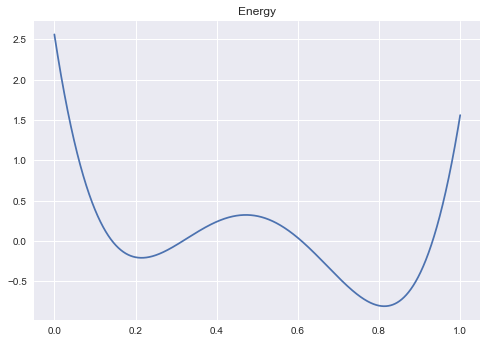

	 global minimum : (0.813028, 0.80665)
	 local minimum :  (0.214994,-0.20730)



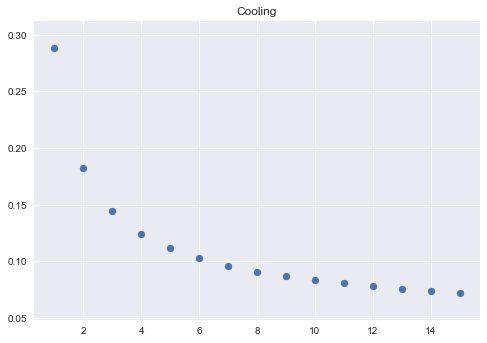

(X0, J0) = (0.00, 2.56)
(X0, J0) = (0.00, 2.56)

Uniform Distribution Experiment
(X0, J0) = (0.00, 2.56)
(Xmin, Jmin) = (8.13028e-01, -8.06650e-01)

Gaussian Distribution Experiment
(X0, J0) = (0.00, 2.56)
(Xmin, Jmin) = (8.13028e-01, -8.06650e-01)


In [164]:
def energy(x):
    return -x + 100*np.square(x-0.2)*np.square(x-0.8)

def uniformPdf():
    return np.random.uniform(low=-1.0, high=1.0, size=1)

def gaussianPdf():
    return np.random.randn(1)

def decay(TO, k):
    return T0 / np.log(1+k)
    
#grafico da função energy de 0 até 1
x = np.linspace(0, 1, num=1e4)
plt.plot(x,energy(x))
plt.title('Energy')
plt.show()
print('\t global minimum : (0.813028, 0.80665)')
print('\t local minimum :  (0.214994,-0.20730)\n')

# grafico do recozimento
x = np.arange(1,16)
plt.scatter(x, decay (T0, x))
plt.title('Cooling')
plt.show()

N = int(1e4)
K = 16
T0 = 0.2
eps = 0.1

n = 0
k = 1
T = decay(T0, k)
end = False

Xmin_uni = X_uni = X0_uni = 0
Jmin_uni = J_uni = J0_uni = energy(X0_uni)

Xmin_gauss = X_gauss = X0_gauss = 0
Jmin_gauss = J_gauss = J0_gauss = energy(X0_gauss)

print('(X0, J0) = ({:1.2f}, {:1.2f})'.format(Xmin_uni, Jmin_uni))
print('(X0, J0) = ({:1.2f}, {:1.2f})'.format(Xmin_gauss, Jmin_gauss))
print()
# TODO: add external temperature loop

while not end:
    n = n + 1
    
    # Uniform Distribution Experiment
    Xn_uni = X_uni + eps*uniformPdf()
    Jn_uni = energy(Xn_uni)
    if np.exp(-(Jn_uni-J_uni)/T) > np.random.rand(1):
        X_uni = Xn_uni
        J_uni = Jn_uni
    if Jn_uni < Jmin_uni:
        Xmin_uni = Xn_uni
        Jmin_uni = Jn_uni
    
    # Gaussian Distribution Experiment
    Xn_gauss = X_gauss + eps*gaussianPdf()
    Jn_gauss = energy(Xn_gauss)
    if np.exp(-(Jn_gauss-J_gauss)/T) > np.random.rand(1):
        X_gauss = Xn_gauss
        J_gauss = Jn_gauss
    if Jn_gauss < Jmin_gauss:
        Xmin_gauss = Xn_gauss
        Jmin_gauss = Jn_gauss
    
    #cooling
    if n % N == 0:
        k = k + 1
        T = decay(T0, k)
        if k == K:
            end = True
#     print()

print('Uniform Distribution Experiment')        
print('(X0, J0) = ({:1.2f}, {:1.2f})'.format(X0_uni, J0_uni))
print('(Xmin, Jmin) = ({:1.5e}, {:1.5e})'.format(Xmin_uni[0], Jmin_uni[0]))
print()
print('Gaussian Distribution Experiment')
print('(X0, J0) = ({:1.2f}, {:1.2f})'.format(X0_gauss, J0_gauss))
print('(Xmin, Jmin) = ({:1.5e}, {:1.5e})'.format(Xmin_gauss[0], Jmin_gauss[0]))

Questao 4. (Repetir a questao 3 para uma funcao J diferente

$$ J(x,y) = − 1.5x + 400( x − 0.1)^2( x − 1.8)^2 -3y + 50( y − 2.5)^2( y − 1.2)^2 $$

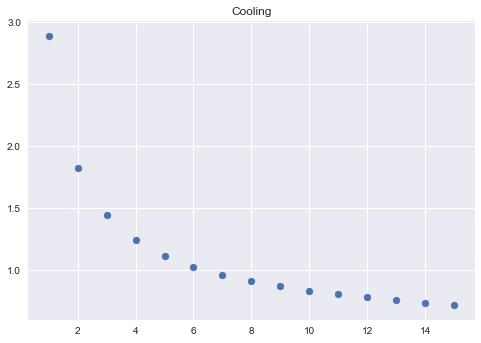

(X0, Y0) = (0.00, 0.00)
J(X0, Y0) = 462.96000

(Xmin, Ymin) = (0.10, 2.52)
J(Xmin, Ymin) = -7.67641


In [79]:
def energy(X):
    x = X[0]
    y = X[1]
    # global minimum at (1.80065, 2.51707) with energy = -10.2264
    return - 1.5*x - 3*y + 400*np.square(x-0.1)*np.square(x-1.8) + 50*np.square(y-2.5)*np.square(y-1.2)

def gaussianPdf(k):
    return np.random.randn(k)

def decay(TO, k):
    return T0 / np.log(1+k)

N = int(1e5)
K = 30
T0 = 2
eps = 0.2

# grafico do recozimento
x = np.arange(1,16)
plt.scatter(x, decay (T0, x))
plt.title('Cooling')
plt.show()

n = 0
k = 1
T = decay(T0, k)
end = False

Xmin = X = X0 = np.zeros(2)
Jmin = J = J0 = energy(X0)

print('(X0, Y0) = ({:1.2f}, {:1.2f})'.format(Xmin[0], Xmin[1]))
print('J(X0, Y0) = {:1.5f}'.format(Jmin))
print()
# TODO: add external temperature loop

while not end:
    n = n + 1

    # Gaussian Distribution Experiment
    Xn = X + eps*gaussianPdf(2)
    Jn = energy(Xn)
    if np.exp(-(Jn-J)/T) > np.random.rand(1):
        X = Xn
        J = Jn
    if Jn < Jmin:
        Xmin = Xn
        Jmin = Jn

    #cooling
    if n % N == 0:
        k = k + 1
        T = decay(T0, k)
        if k == K:
            end = True

print('(Xmin, Ymin) = ({:1.2f}, {:1.2f})'.format(Xmin[0], Xmin[1]))
print('J(Xmin, Ymin) = {:1.5f}'.format(Jmin))

A funcao energia J(x,y) em questao possui 3 minimos locais alem do minimo global com energia igual a -10,2264. O algoritmo esta convergindo para um desses minimos locais, para tentar evitar isso e forcar a convergencia para o minimo global, uma temperatura inicial T0 mais alta, mais iteracoes N por rodada e mais rodadas K devem ser usadas, o que implica em um tempo de simulacao maior.

In [102]:
print('gaussiana')
print(np.random.randn(10))

print('uniforme')
print(np.random.uniform(low=-1.0, high=1.0, size=10))

gaussiana
[-0.34604286 -1.63429246 -0.6469188  -0.37037445 -1.33644609  1.24725503
  0.55179508  0.70280099 -0.09141267 -0.0502023 ]
uniforme
[ 0.32439395  0.22693211  0.49783939  0.26949667 -0.09907722 -0.16828611
 -0.46181685  0.70950946 -0.33381004 -0.81258952]
